In [1]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score

# import matplotlib.pyplot as plt

from sklearn.externals import joblib

In [2]:
import pickle

In [3]:
import matplotlib.pyplot as plt

In [4]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
import pandas as pd
import numpy as np

In [7]:
import time

In [8]:
from sys import getsizeof

In [9]:
import psutil

### Model trainig with hyper-parameter tuning

In [22]:
## Model developed to be used in for loop without print statement

def model_fit_hyperopt(params):
    try:
        del alg 
    except:
        pass
#     attempt_count += 1
    
#     global num
#     f1 = open("status.txt", "w")
#     f1.write("num:{}".format(num))
#     f1.close() 
#     num = num +1

    ### Asssigning default parameters
#     useTrainCV = False
    cv_folds = 5
    early_stopping_rounds = 50
    print(6,psutil.virtual_memory().available / (1024.0 ** 2))
    ### Forming copy of input datasets
    train_c, valid_c, test_c = train_sample.copy(), valid_sample.copy(), test.copy()
#     out_path = params['out_path']
    predictors, target = list(params['predictors']), params['target']
    print(7,psutil.virtual_memory().available / (1024.0 ** 2))
    
    alg = XGBClassifier(
                learning_rate =params['learning_rate'],
                n_estimators=10,
                max_depth=params['max_depth'],
                min_child_weight=params['min_child_weight'],
                gamma=params['gamma'],
                subsample=params['subsample'],
                colsample_bytree=params['colsample_bytree'],
                objective= 'binary:logistic',
                scale_pos_weight=params['scale_pos_weight'],
                seed=27, n_jobs=6)
    print(8,psutil.virtual_memory().available / (1024.0 ** 2))
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(train_c[predictors].values, label=train_c[target].values)
#         xgtest = xgb.DMatrix(valid_c[predictors].values)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#             metrics = 'auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False, seed=27)
#         ne_new = n_estimators=cvresult.shape[0]
#         alg.set_params(n_estimators=cvresult.shape[0])
        
    #Fit the algorithm on the data
    eval_set = [(valid_c[predictors],valid_c[target])]
    print (8.2,psutil.virtual_memory().available / (1024.0 ** 2))
    alg.fit(train_c[predictors], train_c[target],eval_metric='auc', early_stopping_rounds=early_stopping_rounds, eval_set = eval_set, verbose = True)     
    print(9,psutil.virtual_memory().available / (1024.0 ** 2))
    valid_c.loc[:,'prob'] = alg.predict_proba(valid_c[predictors])[:,1]
    print(10,psutil.virtual_memory().available / (1024.0 ** 2))
    test_c.loc[:,'prob'] = alg.predict_proba(test_c[predictors])[:,1]
    print(11,psutil.virtual_memory().available / (1024.0 ** 2))
    valid_auc = roc_auc_score(np.array(valid_c.loc[:,target]), np.array(valid_c.loc[:,'prob']))
    test_auc = roc_auc_score(np.array(test_c.loc[:,target]), np.array(test_c.loc[:,'prob']))
    print(12,psutil.virtual_memory().available / (1024.0 ** 2))
    loss = 1 - valid_auc
    del train_c
    del valid_c
    del test_c
    print(13,psutil.virtual_memory().available / (1024.0 ** 2))
#     if out_path != None:
#         f = open(os.path.join(out_path, "hyperopt_logs.txt"), "a+")
#         f.write("Valid AUC: {} and Test AUC: {}, loss: {}".format(valid_auc,test_auc,loss))
#         f.close()

    
    print ("Valid AUC: {} and Test AUC: {}, Loss: {}".format(valid_auc, test_auc, loss))
    
    print('-'*25,'LOCALS','-'*25)
    for i in dir():
        if not i.startswith('_'):
            if not i in ['In','Out','exit','get_ipython','quit']:
                print(i,getsizeof(i))
    print('-'*50)
    print('-'*25,'GLOBALS','-'*25)
    for i in globals().keys():
        if not i.startswith('_'):
            if not i in ['In','Out','exit','get_ipython','quit']:
                print(i,getsizeof(i))
    
    print('-'*50)
    return {'loss': loss, 'status': STATUS_OK, 'params': params}

In [11]:
def get_best_model_xgb(space, train, valid, test):
    
#     f = open(os.path.join(out_path, "hyperopt_logs.txt"), "w+")
#     f.close()

    print(4,psutil.virtual_memory().available / (1024.0 ** 2))
    
    trials=Trials()
    global num
    num = 1
    print(5,psutil.virtual_memory().available / (1024.0 ** 2))
    best = fmin(model_fit_hyperopt, space, algo=tpe.suggest, max_evals=3, trials=trials)
    print('trials',getsizeof(trials))
    
    return trials.best_trial['result']['model'], trials.best_trial['result']

In [12]:
# def train_validate_test_split(df, train_percent=.60, validate_percent=.20, seed=42):
#     np.random.seed(seed)
#     perm = np.random.permutation(df.index)
#     m = len(df.index)
#     train_end = int(train_percent * m)
#     validate_end = int(validate_percent * m) + train_end
#     train = df.iloc[perm[:train_end]]
#     validate = df.iloc[perm[train_end:validate_end]]
#     test = df.iloc[perm[validate_end:]]
#     return train, validate, test

In [13]:
def data(df,target):
    processed_df = pd.get_dummies(df,sparse=True)
    df_features = list(set(processed_df.columns) - set([target]))
#     train, valid, test = train_validate_test_split(processed_df)
    train = processed_df.ix[train_o.index]
    valid = processed_df.ix[valid_o.index]
    test = processed_df.ix[test_o.index]
    return train, valid, test, df_features, target

In [14]:
train_o = pd.read_csv('../../data/train_insurance.csv',index_col = 0)
valid_o = pd.read_csv('../../data/valid_insurance.csv',index_col = 0)
test_o = pd.read_csv('../../data/test_insurance.csv',index_col = 0)

In [15]:
all_data = pd.concat([train_o,valid_o,test_o])

In [16]:
all_data.drop(['StartedFlag','EstimateTotal'],axis=1,inplace=True)

In [17]:
train, valid, test, df_features, df_target = data(all_data,target='NewEstimateTotal')
del all_data
train_sample = train.head(100000)
valid_sample = valid.head(20000)
del train
del valid
del train_o
del valid_o
del test_o
# del test

/home/ambuj/izenda_fullcycle/izenda_insurance_data/insurance_env/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/ambuj/izenda_fullcycle/izenda_insurance_data/insurance_env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ambuj/izenda_fullcycle/izenda_insurance_data/insurance_env/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stabl

In [23]:
start_time = time.time()
print(1,psutil.virtual_memory().available / (1024.0 ** 2))
space = {'learning_rate': hp.choice('learning_rate',[0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]),
                     'min_child_weight': hp.choice('min_child_weight', [0,1,2,3,4,5,6,7]),
                     'max_depth': hp.choice('max_depth', [3,4,5,6,7,8,9,10]),
                     'gamma': hp.choice('gamma', [0,1,5,10]),
                     'subsample': hp.choice('subsample',np.arange(0.4,1.05,0.1)),
                     'colsample_bytree': hp.choice('colsample_bytree',np.arange(0.5,1.05,0.1)),
                     'scale_pos_weight': (len(train_sample) -train_sample[df_target].sum())/train_sample[df_target].sum(),
                     'predictors': df_features,
                     'target': df_target
        }
print(2,psutil.virtual_memory().available / (1024.0 ** 2))
best_model, best_trails1 = get_best_model_xgb(space, train_sample, valid_sample, test)
print(3,psutil.virtual_memory().available / (1024.0 ** 2))

# To save model
with open('insurance_classify_100000_estimate_total_hyperopt.pkl', 'wb') as f:
    pickle.dump(best_model, f)


f = open("estimate_total_100000_hyperopt.txt", "w")
f.write("Took {} seconds with best trails as: {}".format(time.time()-start_time,best_trails1))
f.close() 

1 26079.2578125
2 26079.2578125
4 26079.2578125
5 26079.2578125
6 26076.57421875
7 26075.50390625
8 26075.50390625
8.2 26073.6875
[0]	validation_0-auc:0.84129
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.841957
[2]	validation_0-auc:0.842024
[3]	validation_0-auc:0.842627
[4]	validation_0-auc:0.844597
[5]	validation_0-auc:0.844783
[6]	validation_0-auc:0.844732
[7]	validation_0-auc:0.844788
[8]	validation_0-auc:0.8448
[9]	validation_0-auc:0.845099
9 21384.2421875
10 21383.8515625
11 21373.82421875
12 21384.375
13 21385.80078125
Valid AUC: 0.8450990271542971 and Test AUC: 0.8426641208372383, Loss: 0.15490097284570292
------------------------- LOCALS -------------------------
alg 52
cv_folds 57
early_stopping_rounds 70
eval_set 57
loss 53
params 55
predictors 59
target 55
test_auc 57
valid_auc 58
--------------------------------------------------
------------------------- GLOBALS -------------------------
pickle 55
joblib 55
f 58
pd 51
df_target 58


KeyError: 'model'

In [27]:
# To save model
with open('insurance_classify_100000_estimate_total.pkl', 'wb') as f:
    pickle.dump(model, f)

In [29]:
# To load the pickle model\n",
with open('insurance_classify_100000_estimate_total.pkl', 'rb') as f:
    model = pickle.load(f)

In [15]:
valid.loc[:,'prob_up'] = model.predict_proba(valid[df_features])[:,1]

valid['prediction'] = np.where(valid.prob_up > 0.5,1,0)

accuracy_score(valid.NewEstimateTotal, valid.prediction)

0.812993473151541

In [16]:
test.loc[:,'prob_up'] = model.predict_proba(test[df_features])[:,1]

test['prediction'] = np.where(test.prob_up > 0.5,1,0)

accuracy_score(test.NewEstimateTotal, test.prediction)

0.8135971687229924

In [28]:
# Confusion Matrix on Test Data
metrics.confusion_matrix(test.NewEstimateTotal, test.prediction)

array([[ 81360,  18859],
       [ 28807, 126689]])

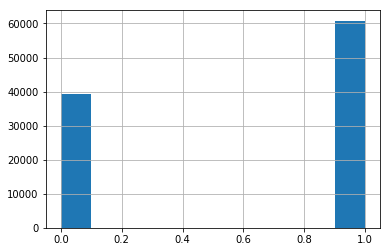

In [21]:
train.head(100000).NewEstimateTotal.hist()

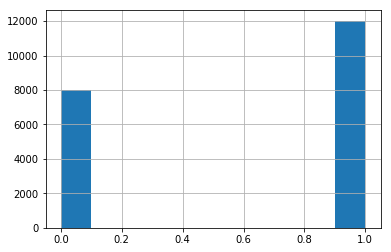

In [22]:
valid.head(20000).NewEstimateTotal.hist()

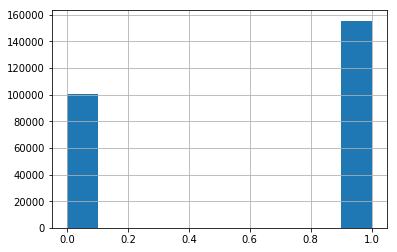

In [23]:
test.NewEstimateTotal.hist()